In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
titanic=sns.load_dataset("titanic")
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [ ]:
#Normalixation:to eliminate the unit/redundant.
#type of normalization
# 1min max scaling
# 2:mean normalization
# 3:max absolute
# 4:reboust scaling

In [4]:
# 1 : MIn_max_scaling: its scaled between 0 and 1 scaled:[0,1]:
# weight=30,40,44,2,2,1,231,32,12,321,321,31,23........1000 
# apply min max on the weight formoula=xi-m(min)/x(max)-x(min)
#min value is 1 and max is 321 put these value in the formoula: 321-1/321-1=1

In [12]:
df=pd.read_csv("winequality-red.csv")
df.sample(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
950,8.9,0.12,0.45,1.8,0.075,10.0,21.0,0.99552,3.41,0.76,11.9,7
147,7.6,0.49,0.26,1.6,0.236,10.0,88.0,0.99680,3.11,0.80,9.3,5
558,10.9,0.53,0.49,4.6,0.118,10.0,17.0,1.00020,3.07,0.56,11.7,6


In [14]:
df=df[["alcohol","quality","citric acid"]]
df.sample(4)

,alcohol,quality,citric acid
637,9.4,5,0.27
1085,9.6,5,0.08
1227,9.6,5,0.25
1571,11.1,6,0.14


<Axes: xlabel='alcohol', ylabel='Density'>

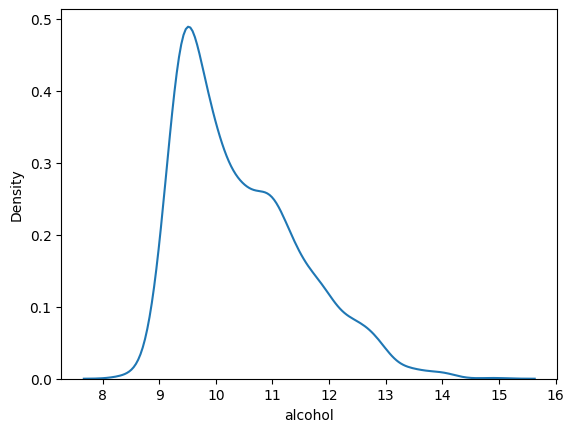

In [17]:
sns.kdeplot(df["alcohol"])

<Axes: xlabel='quality', ylabel='Density'>

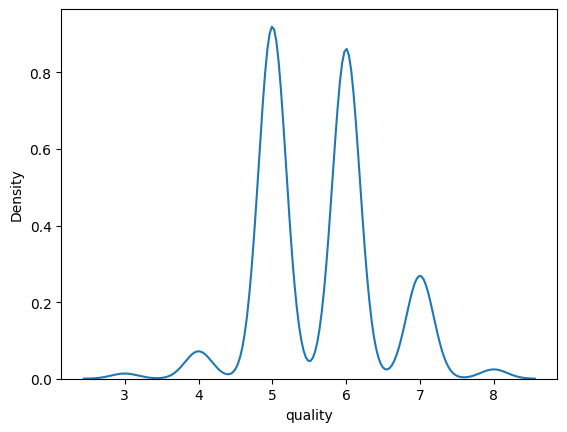

In [18]:
sns.kdeplot(df["quality"])

<Axes: xlabel='citric acid', ylabel='Density'>

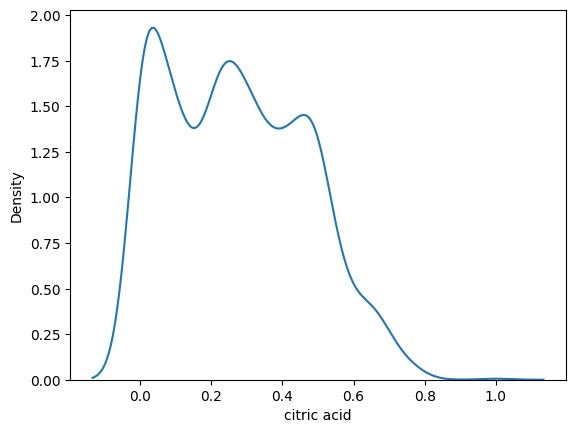

In [19]:
sns.kdeplot(df["citric acid"])

<Axes: xlabel='alcohol', ylabel='citric acid'>

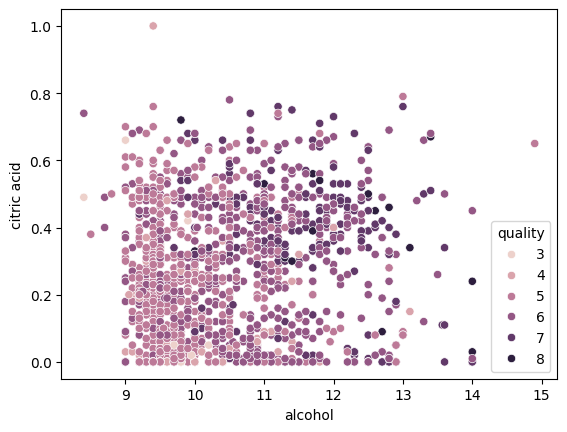

In [21]:
sns.scatterplot(data=df,x="alcohol",y="citric acid",hue="quality")

In [28]:
x=df[["alcohol","citric acid"]]
y=df[["quality"]]
y.sample(3)

,quality
1273,5
1264,6
873,7


In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=0)

In [36]:
x_train,y_train.shape

(      alcohol  citric acid
 92        9.8         0.29
 1017     12.7         0.37
 1447      9.7         0.00
 838      11.2         0.35
 40       10.5         0.36
 ...       ...          ...
 763       9.6         0.26
 835       9.3         0.10
 1216      9.5         0.31
 559      12.7         0.49
 684       9.4         0.32
 
 [1119 rows x 2 columns],
 (1119, 1))

In [37]:
from sklearn.preprocessing import MinMaxScaler


In [38]:
Scalar=MinMaxScaler()

In [39]:
Scalar.fit(x_train)

MinMaxScaler()

In [40]:
x_train_scaled=Scalar.transform(x_train)
x_test_scaled=Scalar.transform(x_test)

In [44]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=["alcohol","citric acid"])
x_test_scaled=pd.DataFrame(x_test_scaled,columns=["alcohol","citric acid"])


In [48]:
print(np.round(x.describe(),1))
print(np.round(x_train_scaled.describe(),1))

       alcohol  citric acid
count   1599.0       1599.0
mean      10.4          0.3
std        1.1          0.2
min        8.4          0.0
25%        9.5          0.1
50%       10.2          0.3
75%       11.1          0.4
max       14.9          1.0
       alcohol  citric acid
count   1119.0       1119.0
mean       0.3          0.3
std        0.2          0.2
min        0.0          0.0
25%        0.2          0.1
50%        0.3          0.3
75%        0.4          0.4
max        1.0          1.0


<Axes: xlabel='alcohol', ylabel='citric acid'>

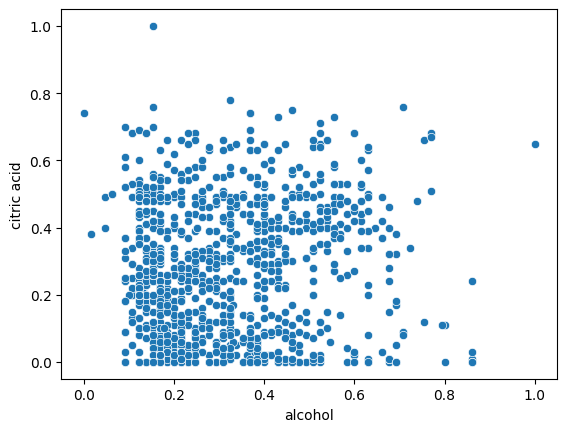

In [54]:
sns.scatterplot(data=x_train_scaled,x="alcohol",y="citric acid")

<Axes: xlabel='alcohol', ylabel='Density'>

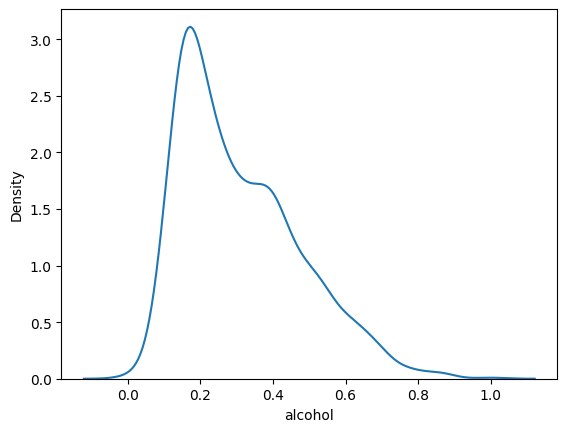

In [55]:
sns.kdeplot(data=x_train_scaled["alcohol"])

<Axes: xlabel='citric acid', ylabel='Density'>

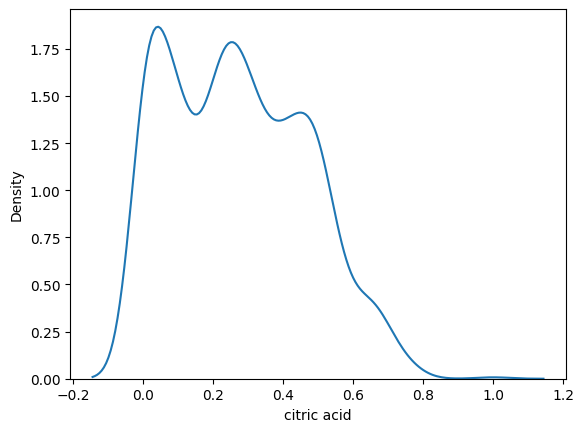

In [57]:
sns.kdeplot(data=x_train_scaled["citric acid"])

<Axes: ylabel='alcohol'>

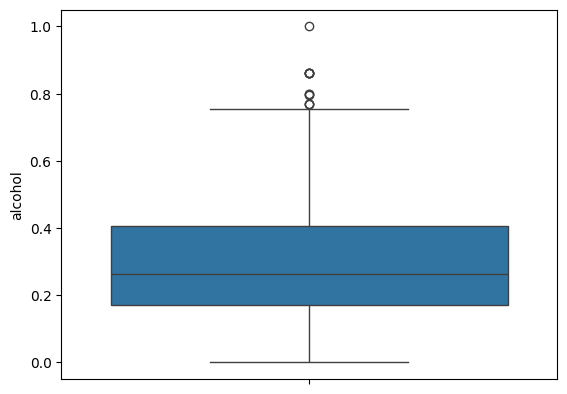

In [58]:
sns.boxplot(data=x_train_scaled["alcohol"])

<Axes: ylabel='citric acid'>

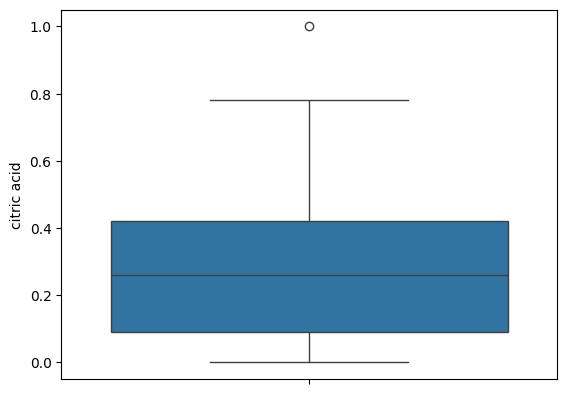

In [59]:
sns.boxplot(data=x_train_scaled["citric acid"])

<Axes: ylabel='quality'>

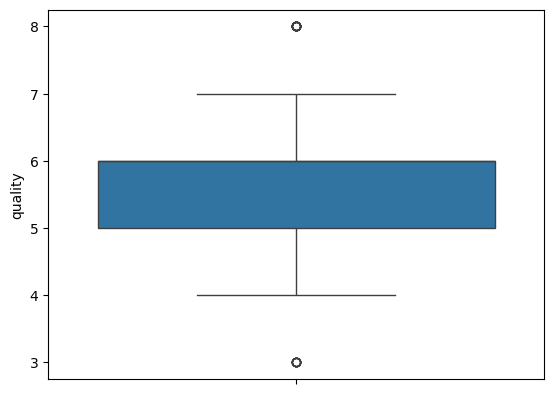

In [65]:
sns.boxplot(data=y_train["quality"])

<Axes: ylabel='quality'>

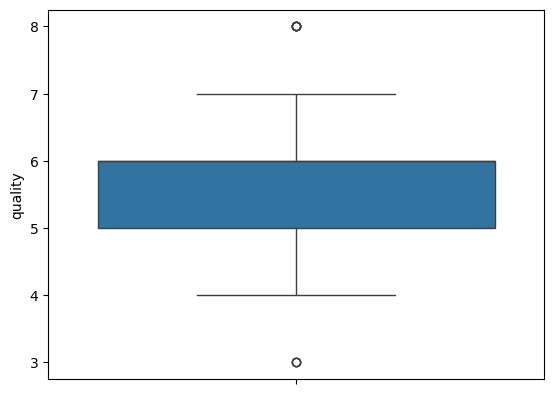

In [66]:
sns.boxplot(data=y_test["quality"])

In [ ]:
#Robust Scaling
#formoula=x-x(median)/iqr 

In [68]:
#Normalization vs Standardization
#most problem gona solved with standardization
#Normalization use where you know already the minimum and maximum value
#outlier for robust scalar
#sparse for max abs scaler